In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

import sys
sys.path.append('..')
from Scripts.utils import (find_potential_outliers,plot_facetgrid)

# show all columns 
pd.set_option('display.max_columns', None)
# show entire rows
pd.set_option('display.max_rows', None)
# show all values in a cell
pd.set_option('display.max_colwidth', None)

## Carregamento e exploração dos dados

In [118]:
raw_df = pd.read_excel('../Data/raw_data.xlsx')
raw_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio


In [119]:
# Verificando o tamanho do dataset
print('O dataset possui {} linhas e {} colunas'.format(raw_df.shape[0], raw_df.shape[1]))
print('-----------------------------------------')
# Verificando os tipos de dados
print('Tipos de dados:')
print(raw_df.dtypes)

O dataset possui 456 linhas e 24 colunas
-----------------------------------------
Tipos de dados:
codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object


In [120]:
print('-----------------------------------------')
print('Valores não numéricos na coluna rendaMedia:')
non_numeric_values = raw_df['rendaMedia'].notna() & raw_df['rendaMedia'].str.contains(r'[^\d]+', regex=True)
non_numeric_unique_values = raw_df.loc[non_numeric_values, 'rendaMedia'].unique()
print(non_numeric_unique_values)

-----------------------------------------
Valores não numéricos na coluna rendaMedia:
['-']


In [121]:
# show rows where rendaMedia is not numeric
raw_df.loc[non_numeric_values, :]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
232,355030170,Eta Guaraú,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN
361,355030227,Pico Do Jaraguá,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN
376,355030167,Reserva Da Cantareira,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN


In [122]:
# show rows where rendaMedia is null
raw_df.loc[raw_df['rendaMedia'].isnull(), :]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,5573,3556,4761,355,759,1771,1863,1902,1155,326,424,NaN,1092081.0,Baixo
26,3304557005,Catumbi,Rio de Janeiro,RJ,12910,1773,805,1018,999,1985,2526,1516,2288,0,18,261,640,1281,1140,229,703,NaN,791170.0,Baixo
52,3304557086,Freguesia (Jacarepaguá),Rio de Janeiro,RJ,72501,7991,3709,5257,5159,10923,16875,9607,12980,698,2569,6042,4941,5055,3919,704,1670,NaN,1297388.0,Médio
71,3304557146,Jacaré,Rio de Janeiro,RJ,9538,1326,629,763,712,1547,1921,1108,1532,0,15,161,492,633,792,197,540,NaN,822849.0,Baixo
89,3304557032,Maracanã,Rio de Janeiro,RJ,25969,1696,843,1370,1921,4020,5134,4124,6861,739,1695,3191,1924,1522,877,0,497,NaN,1384873.0,Baixo
122,3304557006,Rio Comprido,Rio de Janeiro,RJ,44998,5332,2397,3448,3757,7160,9375,5527,8002,0,387,2119,2775,3715,3930,617,1681,NaN,789463.0,Baixo


In [123]:
# calculo da % de dados nulos do RJ
rj_null = raw_df.loc[raw_df['estado'] == 'RJ', 'rendaMedia'].isnull().sum()
rj_total = raw_df.loc[raw_df['estado'] == 'RJ', 'rendaMedia'].shape[0]
rj_null_percent = rj_null / rj_total * 100
print('A % de dados nulos da coluna rendaMedia no estado do RJ é de {:.2f}%'.format(rj_null_percent))

A % de dados nulos da coluna rendaMedia no estado do RJ é de 3.75%


In [124]:
# drop rows where rendaMedia is null and '-' and convert to numeric
clean_df = raw_df.loc[~(raw_df['rendaMedia'].isnull() | raw_df['rendaMedia'].str.contains(r'[^\d]+', regex=True)), :].copy()
clean_df['rendaMedia'] = clean_df['rendaMedia'].astype('float64')

## Análise exploratória dos dados

In [125]:
clean_df['popDe25a49'] = clean_df['popDe25a34'] + clean_df['popDe35a49']
clean_df['domiciliosA'] = clean_df['domiciliosA1'] + clean_df['domiciliosA2']
clean_df['domiciliosB'] = clean_df['domiciliosB1'] + clean_df['domiciliosB2']
clean_df['popAte14'] = clean_df['popAte9'] + clean_df['popDe10a14']
clean_df['domicilios'] = clean_df['domiciliosA'] + clean_df['domiciliosB'] + clean_df['domiciliosC1'] + clean_df['domiciliosC2'] + clean_df['domiciliosD'] + clean_df['domiciliosE']
clean_df['propDomiciliosCriancas'] = clean_df['popAte14'] / clean_df['domicilios']
clean_df['propDomiciliosIdosos'] = clean_df['popMaisDe60'] / clean_df['domicilios']
clean_df['rendaTotal'] = clean_df['rendaMedia']*(clean_df['domiciliosA1']+clean_df['domiciliosA2']+clean_df['domiciliosB1']+clean_df['domiciliosB2']+clean_df['domiciliosC1']+clean_df['domiciliosC2']+clean_df['domiciliosD']+clean_df['domiciliosE'])
clean_df['rendaMediaPop'] = clean_df['rendaTotal']/clean_df['população']
clean_df['propDomiciliosA'] = clean_df['domiciliosA'] / clean_df['domicilios']
clean_df['propDomiciliosB'] = clean_df['domiciliosB'] / clean_df['domicilios']
clean_df['propDomiciliosC'] = (clean_df['domiciliosC1'] + clean_df['domiciliosC2']) / clean_df['domicilios']
clean_df['propDomiciliosD'] = clean_df['domiciliosD'] / clean_df['domicilios']
clean_df['propDomiciliosE'] = clean_df['domiciliosE'] / clean_df['domicilios']

extra_features = ['popDe25a49', 'domiciliosA', 'domiciliosB', 'popAte14', 'domicilios', 'propDomiciliosCriancas', 'propDomiciliosIdosos', 'rendaTotal', 'rendaMediaPop', 'propDomiciliosA', 'propDomiciliosB', 'propDomiciliosC', 'propDomiciliosD', 'propDomiciliosE']

In [126]:
clean_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,Médio,3975,145,1957,1510,4349,0.347206,0.671189,10876849.0,931.556098,0.033341,0.449989,0.425615,0.021154,0.069901
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,Baixo,10118,0,588,7319,8451,0.866051,0.283635,7867881.0,285.440466,0.000000,0.069578,0.536031,0.097858,0.296533
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,Baixo,3831,96,1056,1282,2649,0.483956,0.535674,6333759.0,703.516495,0.036240,0.398641,0.440166,0.029068,0.095885
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,Médio,3324,292,910,1610,3154,0.510463,0.629677,11754958.0,1223.709973,0.092581,0.288523,0.484781,0.043437,0.090679
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,Médio,20932,0,3910,11451,18776,0.609874,0.436195,25910880.0,452.813254,0.000000,0.208245,0.560929,0.057147,0.173679


In [127]:
# Verificando a quantidade de valores nulos para cada estado
clean_df.groupby('estado').apply(lambda x: x.isnull().sum())

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293,293,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# Verificando a quantidade de valores unique para cada estado
clean_df.groupby('estado').apply(lambda x: x.nunique())

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RJ,154,154,1,1,153,153,153,151,152,154,153,153,151,38,101,148,150,152,153,138,153,146,154,3,154,100,154,154,154,154,154,154,154,106,154,154,146,154
SP,293,293,1,1,293,288,285,286,285,292,292,291,290,144,214,280,285,285,283,233,283,284,0,0,290,218,289,293,291,293,293,293,293,235,293,293,259,293


In [129]:
# Dividindo o dataset entre raw_df_sp e raw_df_rj
clean_df_sp = clean_df[clean_df['estado'] == 'SP']
clean_df_rj = clean_df[clean_df['estado'] == 'RJ']

In [130]:
print('-----------------------------------------')
# Valores distintos de cidade, estado e potencial para SP
cidade_sp = clean_df_sp['cidade'].unique()
bairro_sp = clean_df_sp['nome'].unique()
potencial_sp = clean_df_sp['potencial'].unique()

# Valores distintos de cidade, estado e potencial para RJ
cidade_rj = clean_df_rj['cidade'].unique()
bairro_rj = clean_df_rj['nome'].unique()
potencial_rj = clean_df_rj['potencial'].unique()

# Criando um DataFrame para armazenar os valores distintos
tabela_distintos = pd.DataFrame({
    'coluna': ['cidade','bairro', 'potencial'],
    'SP': [cidade_sp, bairro_sp, potencial_sp],
    'RJ': [cidade_rj, bairro_rj, potencial_rj]
})

# Exibindo a tabela comparativa
tabela_distintos

-----------------------------------------


,coluna,SP,RJ
0,cidade,[São Paulo],[Rio de Janeiro]
1,bairro,"[A. E. Carvalho, Aclimação, Adventista, Água Branca, Água Funda, Água Rasa, Águia De Haia, Alfredo Pujol, Alto Da Lapa, Alto Da Mooca, Alto De Pinheiros, Ana Rosa, Anhanguera, Aricanduva, Armênia, Artur Alvim, Bandeirantes, Barra Funda, Bela Vista, Belém, Berrini - Vila Funchal, Bexiga, Boçava, Bom Retiro, Bonfiglioli, Bororé, Bosque Da Saúde, Brás, Brasilândia, Bresser, Brooklin, Butantã, Cachoeirinha, Cambuci, Campo Belo, Campo Grande, Campo Limpo, Cangaíba, Canindé, Cantareira, Capão Redondo, Capivari - Monos, Cardoso De Almeida, Casa Verde, Casa Verde Alta, Catumbi, Cdc Vigor, Ceasa, Centro Empresarial, Chácara Flora, Chácara Itaim, Chácara Klabin, Chácara Santo Antônio, Cidade Ademar, Cidade Dutra, Cidade Líder, Cidade Nitro-Operária, Cidade Quarto Centenário, Cidade Satélite, Cidade Tiradentes, Cidade Universitária, Cidade Vargas, Clínicas, Cocaia, Cohab Jova Rural, Congonhas, Consolação, Cratera - Colônia, Emissário, Encruzilhada - Barragem, Ermelino Matarazzo, Estação Tamanduateí, Fábrica Bandeirante, Fazenda Caguaçu, Fazenda Da Juta, Fazenda Itaim, Fazenda Morumbi, Freguesia Do Ó, Gasômetro, Gleba Pêssego, Glicério, Grajaú, Granja Julieta, Guaianazes, Guarapiranga, Heliópolis, Higienópolis, Horto Florestal, Iguatemi, Independência, Interlagos, Ipiranga, Itaberaba, Itaim Paulista, Itaquera, Jabaquara, Jaçanã, Jaceguava, Jaguaré, Jardim Adalgiza, ...]","[Abolição, Acari, Água Santa, Alto Da Boa Vista, Anchieta, Andaraí, Bancários, Bangu, Barra Da Tijuca, Barra De Guaratiba, Barros Filho, Benfica, Bento Ribeiro, Bonsucesso, Botafogo, Brás De Pina, Cachambi, Cacuia, Caju, Camorim, Campinho, Campo Dos Afonsos, Campo Grande, Cascadura, Catete, Cavalcanti, Centro, Cidade De Deus, Cidade Nova, Cidade Universitária, Cocotá, Coelho Neto, Colégio, Complexo Do Alemão, Copacabana, Cordovil, Cosme Velho, Cosmos, Costa Barros, Curicica, Del Castilho, Deodoro, Encantado, Engenheiro Leal, Engenho Da Rainha, Engenho De Dentro, Engenho Novo, Estácio, Flamengo, Freguesia (Ilha Do Governador), Galeão, Gamboa, Gardênia Azul, Gávea, Gericinó, Glória, Grajaú, Grumari, Guadalupe, Guaratiba, Higienópolis, Honório Gurgel, Humaitá, Inhaúma, Inhoaíba, Ipanema, Irajá, Itanhangá, Jacarepaguá, Jacarezinho, Jardim América, Jardim Botânico, Jardim Carioca, Jardim Guanabara, Jardim Sulacap, Joá, Lagoa, Laranjeiras, Leblon, Leme, Lins De Vasconcelos, Madureira, Magalhães Bastos, Mangueira, Manguinhos, Maré, Marechal Hermes, Maria Da Graça, Méier, Moneró, Olaria, Oswaldo Cruz, Paciência, Padre Miguel, Paquetá, Parada De Lucas, Parque Anchieta, Parque Columbia, Pavuna, Pechincha, ...]"
2,potencial,[nan],"[Médio, Baixo, Alto]"


In [131]:
# Analise de duplicatas em relação ao nome do bairro
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao nome do bairro:')
print('SP: ', clean_df_sp['nome'].duplicated().sum())
print('RJ: ', clean_df_rj['nome'].duplicated().sum())
# Analise de duplicatas em relação ao codigo
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao codigo do bairro:')
print('SP: ', clean_df_sp['codigo'].duplicated().sum())
print('RJ: ', clean_df_rj['codigo'].duplicated().sum())

-----------------------------------------
Quantidade de duplicatas em relação ao nome do bairro:
SP:  0
RJ:  0
-----------------------------------------
Quantidade de duplicatas em relação ao codigo do bairro:
SP:  0
RJ:  0


In [132]:
clean_df_rj.corr(numeric_only=True)['faturamento'].abs().sort_values(ascending=False)

faturamento               1.000000
propDomiciliosC           0.787247
domiciliosA               0.784094
domiciliosA2              0.781901
domiciliosA1              0.757360
propDomiciliosA           0.723152
rendaTotal                0.686973
propDomiciliosCriancas    0.670689
propDomiciliosD           0.630973
domiciliosB1              0.611988
propDomiciliosB           0.592633
rendaMediaPop             0.573526
propDomiciliosIdosos      0.561436
rendaMedia                0.556335
propDomiciliosE           0.525988
domiciliosD               0.515005
domiciliosC2              0.481882
domiciliosE               0.414675
codigo                    0.390661
domiciliosB               0.342868
domiciliosC1              0.327108
popDe10a14                0.308244
popAte14                  0.304076
popAte9                   0.302087
popDe15a19                0.296336
popDe20a24                0.252967
popDe25a34                0.198317
popDe25a49                0.185360
popDe35a49          

In [133]:
# drop column codigo
clean_df_rj = clean_df_rj.drop(columns=['codigo','cidade','estado'])
clean_df_sp = clean_df_sp.drop(columns=['codigo','cidade','estado'])

In [134]:
dados_domicilios = ['domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
dados_população = ['rendaMedia','população','popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']
dados_faturamento = ['faturamento']
# #dados = dados_domicilios + dados_população + dados_faturamento + extra_features
# dados = dados_domicilios + dados_população + ['domiciliosA','domiciliosB','popDe25a49']
# p = sns.pairplot(clean_df, vars=dados, hue='cidade', palette='Paired', corner=True)
# #p.map_lower(sns.kdeplot, levels=4, color=".2", cmap='Paired')
# p

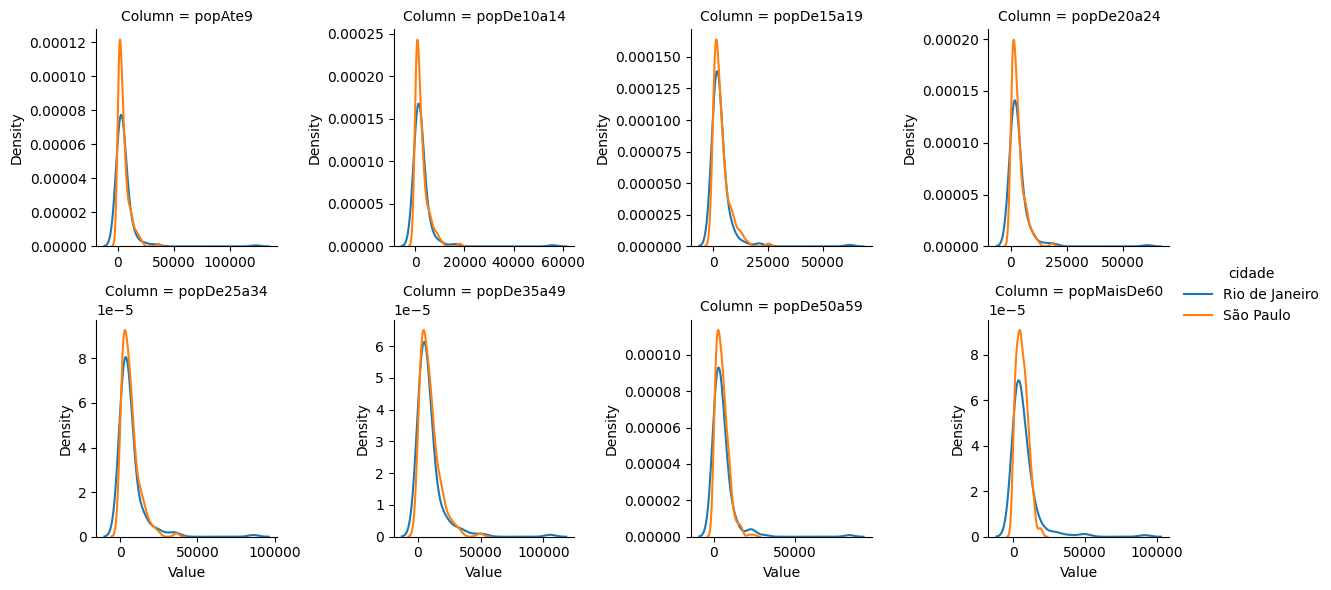

In [135]:
# Melt the DataFrame to create a "long" format
features = ['popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']
plot_facetgrid(clean_df, features, hue='cidade', plot_func=sns.kdeplot)


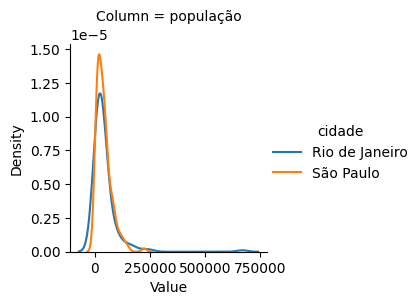

In [136]:
# Melt the DataFrame to create a "long" format
features = ['população']
plot_facetgrid(clean_df, features, hue='cidade', plot_func=sns.kdeplot)


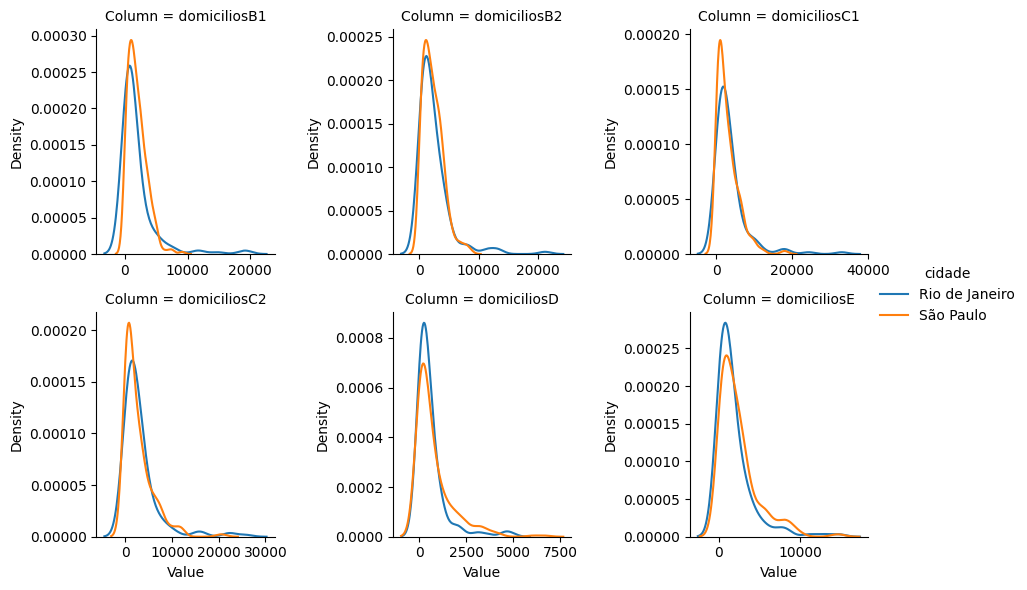

In [137]:
plot_facetgrid(clean_df, dados_domicilios, hue='cidade', plot_func=sns.kdeplot)


In [138]:
top_10_outliers = find_potential_outliers(clean_df_rj,'nome').head(10)
top_10_outliers

,target,n_outliers,outlier_dict
135,Tijuca,24,"{'população': 168267, 'popAte9': 13033, 'popDe10a14': 6405, 'popDe15a19': 9750, 'popDe20a24': 10968, 'popDe25a34': 23657, 'popDe35a49': 33313, 'popDe50a59': 23892, 'popMaisDe60': 47249, 'domiciliosA1': 4351, 'domiciliosA2': 8306, 'domiciliosB1': 19076, 'domiciliosB2': 11631, 'domiciliosC1': 10755, 'rendaMedia': 7844.0, 'faturamento': 2157079.0, 'popDe25a49': 56970, 'domiciliosA': 12657, 'domiciliosB': 30707, 'popAte14': 19438, 'domicilios': 65661, 'rendaTotal': 515044884.0, 'rendaMediaPop': 3060.8787462782366, 'propDomiciliosA': 0.19276282724905194}"
22,Campo Grande,24,"{'população': 667603, 'popAte9': 122578, 'popDe10a14': 55935, 'popDe15a19': 62342, 'popDe20a24': 60567, 'popDe25a34': 86116, 'popDe35a49': 105316, 'popDe50a59': 83341, 'popMaisDe60': 91408, 'domiciliosA2': 1389, 'domiciliosB1': 11747, 'domiciliosB2': 21237, 'domiciliosC1': 33111, 'domiciliosC2': 25779, 'domiciliosD': 4956, 'domiciliosE': 12944, 'faturamento': 69645.0, 'popDe25a49': 191432, 'domiciliosA': 1389, 'domiciliosB': 32984, 'popAte14': 178513, 'domicilios': 111163, 'propDomiciliosCriancas': 1.6058670600829412, 'rendaTotal': 206318528.0}"
8,Barra Da Tijuca,22,"{'população': 139761, 'popAte9': 13038, 'popDe15a19': 7432, 'popDe20a24': 8627, 'popDe25a34': 21914, 'popDe35a49': 32089, 'popDe50a59': 21058, 'popMaisDe60': 30378, 'domiciliosA1': 13408, 'domiciliosA2': 11668, 'domiciliosB1': 14820, 'rendaMedia': 18084.0, 'faturamento': 2915612.0, 'popDe25a49': 54003, 'domiciliosA': 25076, 'domiciliosB': 20025, 'popAte14': 18263, 'domicilios': 54276, 'rendaTotal': 981527184.0, 'rendaMediaPop': 7022.8975465258545, 'propDomiciliosA': 0.4620089910826148, 'propDomiciliosC': 0.09724371729677943}"
68,Jacarepaguá,22,"{'população': 161748, 'popAte9': 24961, 'popDe10a14': 10376, 'popDe15a19': 13874, 'popDe20a24': 16321, 'popDe25a34': 32572, 'popDe35a49': 35693, 'popDe50a59': 14500, 'domiciliosA1': 422, 'domiciliosA2': 1244, 'domiciliosB2': 7984, 'domiciliosC1': 17034, 'domiciliosC2': 15909, 'domiciliosD': 3178, 'domiciliosE': 6837, 'faturamento': 94671.0, 'popDe25a49': 68265, 'domiciliosA': 1666, 'domiciliosB': 11389, 'popAte14': 35337, 'domicilios': 56013, 'rendaTotal': 120988080.0}"
34,Copacabana,21,"{'população': 150524, 'popDe20a24': 9168, 'popDe25a34': 21814, 'popDe35a49': 27567, 'popDe50a59': 21858, 'popMaisDe60': 51445, 'domiciliosA1': 5740, 'domiciliosA2': 9218, 'domiciliosB1': 19350, 'domiciliosB2': 13160, 'domiciliosC1': 10982, 'domiciliosE': 5122, 'rendaMedia': 7381.0, 'faturamento': 2384494.0, 'popDe25a49': 49381, 'domiciliosA': 14958, 'domiciliosB': 32510, 'domicilios': 70052, 'rendaTotal': 517053812.0, 'rendaMediaPop': 3435.0257234726687, 'propDomiciliosA': 0.21352709415862503}"
7,Bangu,21,"{'população': 249987, 'popAte9': 32651, 'popDe10a14': 15949, 'popDe15a19': 20926, 'popDe20a24': 20146, 'popDe25a34': 37750, 'popDe35a49': 53090, 'popDe50a59': 31246, 'popMaisDe60': 38229, 'domiciliosB1': 5246, 'domiciliosB2': 13274, 'domiciliosC1': 24363, 'domiciliosC2': 22447, 'domiciliosD': 4564, 'domiciliosE': 11109, 'faturamento': 35465.0, 'popDe25a49': 90840, 'domiciliosB': 18520, 'popAte14': 48600, 'domicilios': 81499, 'rendaTotal': 126323450.0}"
112,Realengo,21,"{'população': 185206, 'popAte9': 23513, 'popDe10a14': 11337, 'popDe15a19': 14883, 'popDe20a24': 14252, 'popDe25a34': 27747, 'popDe35a49': 39378, 'popDe50a59': 23702, 'popMaisDe60': 30394, 'domiciliosB1': 4551, 'domiciliosB2': 11214, 'domiciliosC1': 18442, 'domiciliosC2': 16361, 'domiciliosD': 3661, 'domiciliosE': 8364, 'faturamento': 89769.0, 'popDe25a49': 67125, 'domiciliosB': 15765, 'popAte14': 34850, 'domicilios': 62835, 'rendaTotal': 99027960.0}"
121,Santa Cruz,18,"{'população': 223440, 'popAte9': 35572, 'popDe10a14': 16403, 'popDe15a19': 20998, 'popDe20a24': 18090, 'popDe25a34': 34697, 'popDe35a49': 46774, 'popDe50a59': 23878, 'popMaisDe60': 27028, 'domiciliosB2': 8310, 'domiciliosC1': 18161, 'domiciliosC2': 22160, 'domiciliosD': 4572, 'domiciliosE': 14833,

In [139]:
top_10_outliers = top_10_outliers['target'].to_list()

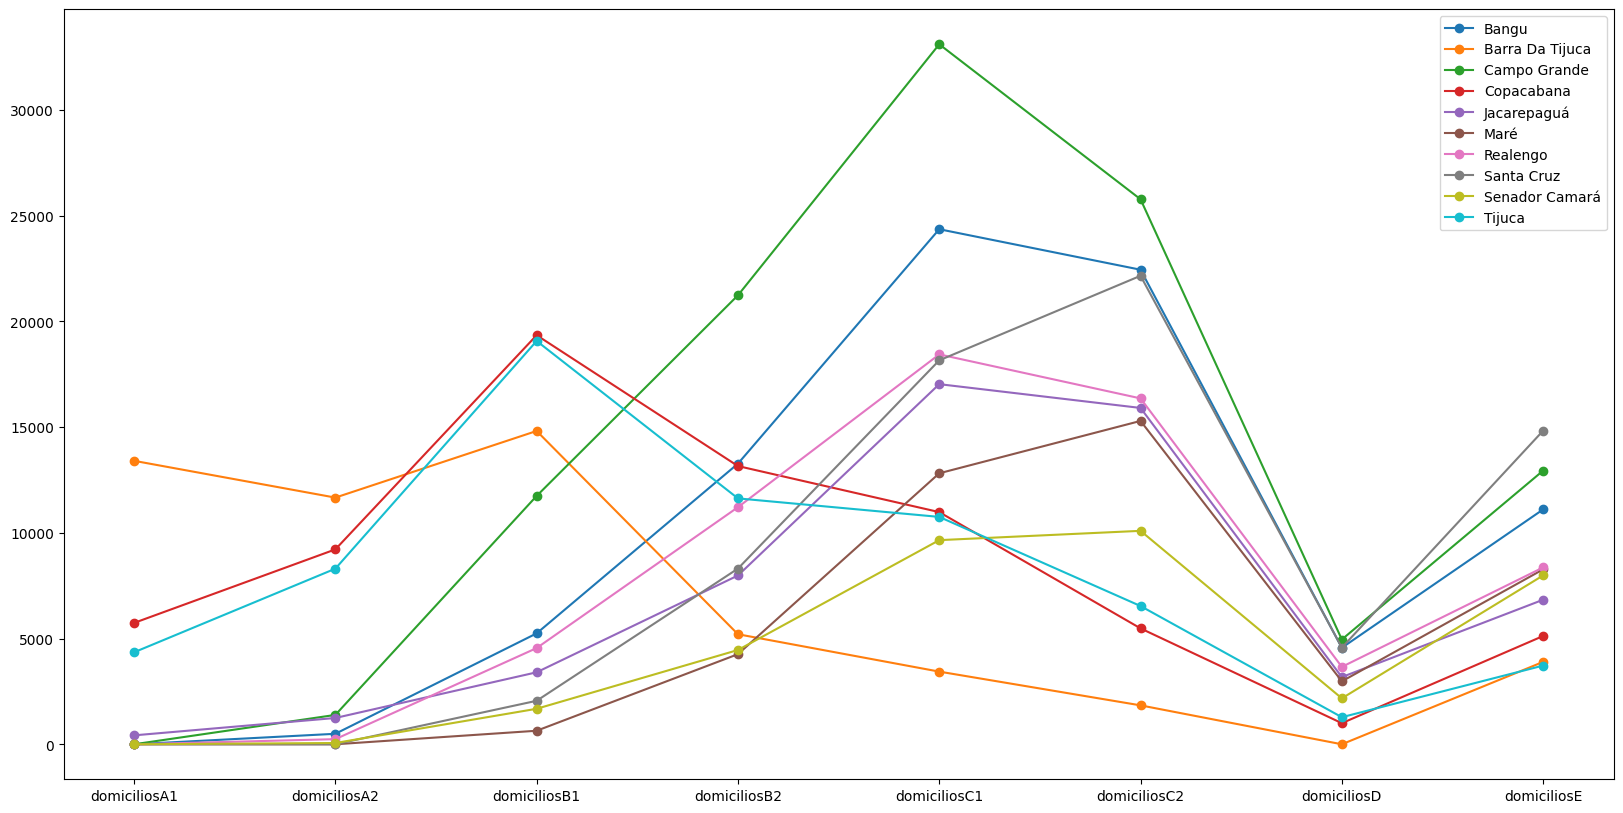

In [140]:
# Create a list of the columns to plot
cols_to_plot = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
df_top_10_outliers = clean_df_rj[clean_df_rj['nome'].isin(top_10_outliers)]

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in df_top_10_outliers.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the smoother line
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
ax.legend()

# Increase the size of the plot
fig.set_size_inches(20, 10)

# Show the plot
plt.show()


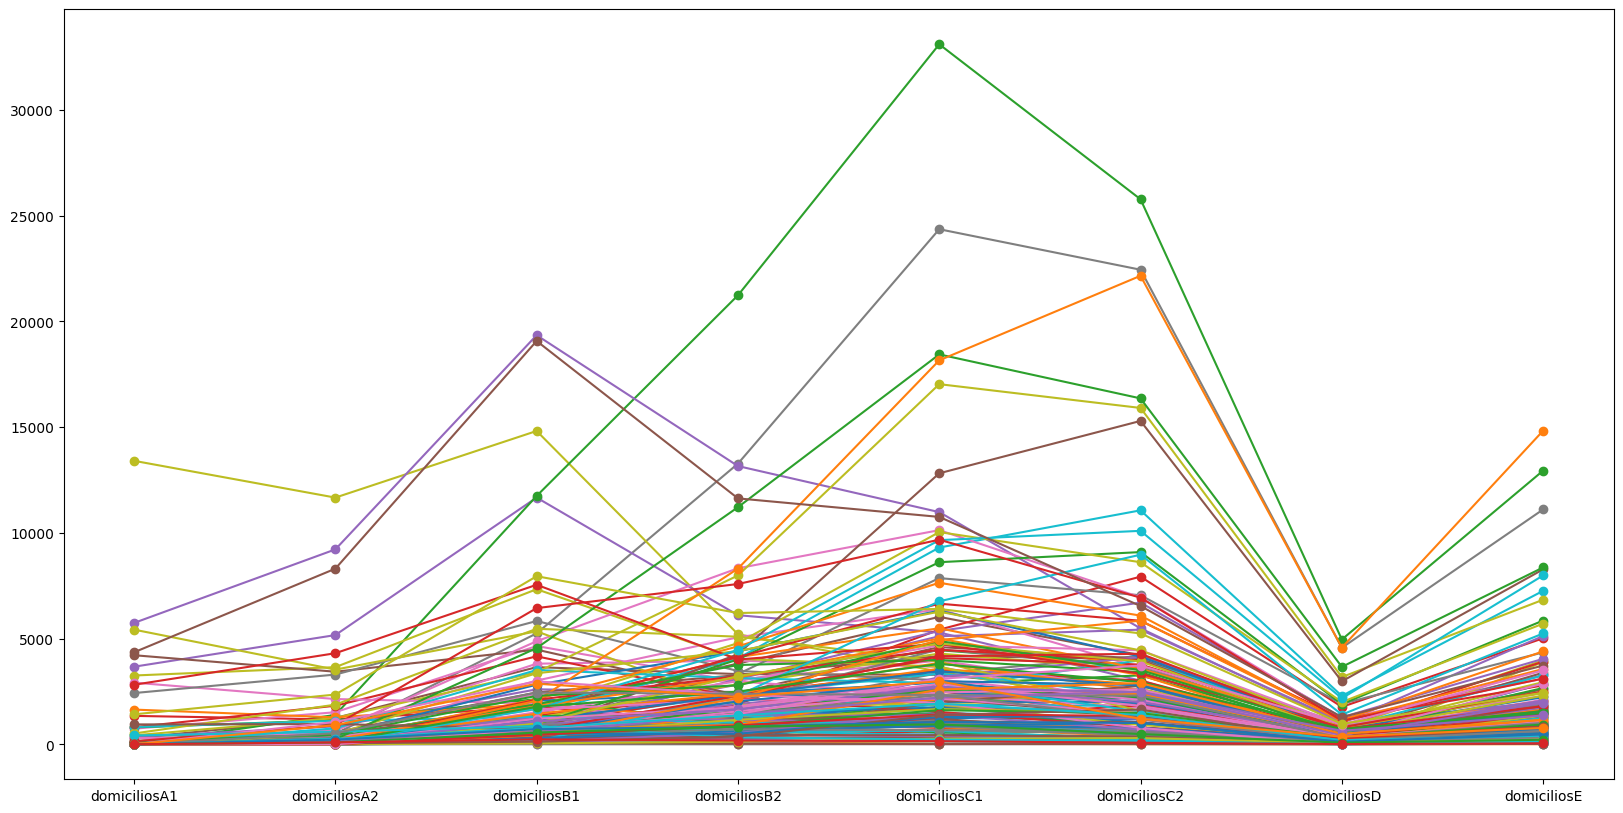

In [141]:
cols_to_plot = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2','domiciliosD', 'domiciliosE']
# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in clean_df_rj.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the distribution curve
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
# ax.legend()
# increase the size of the plot
fig.set_size_inches(20, 10)
# Show the plot
plt.show()

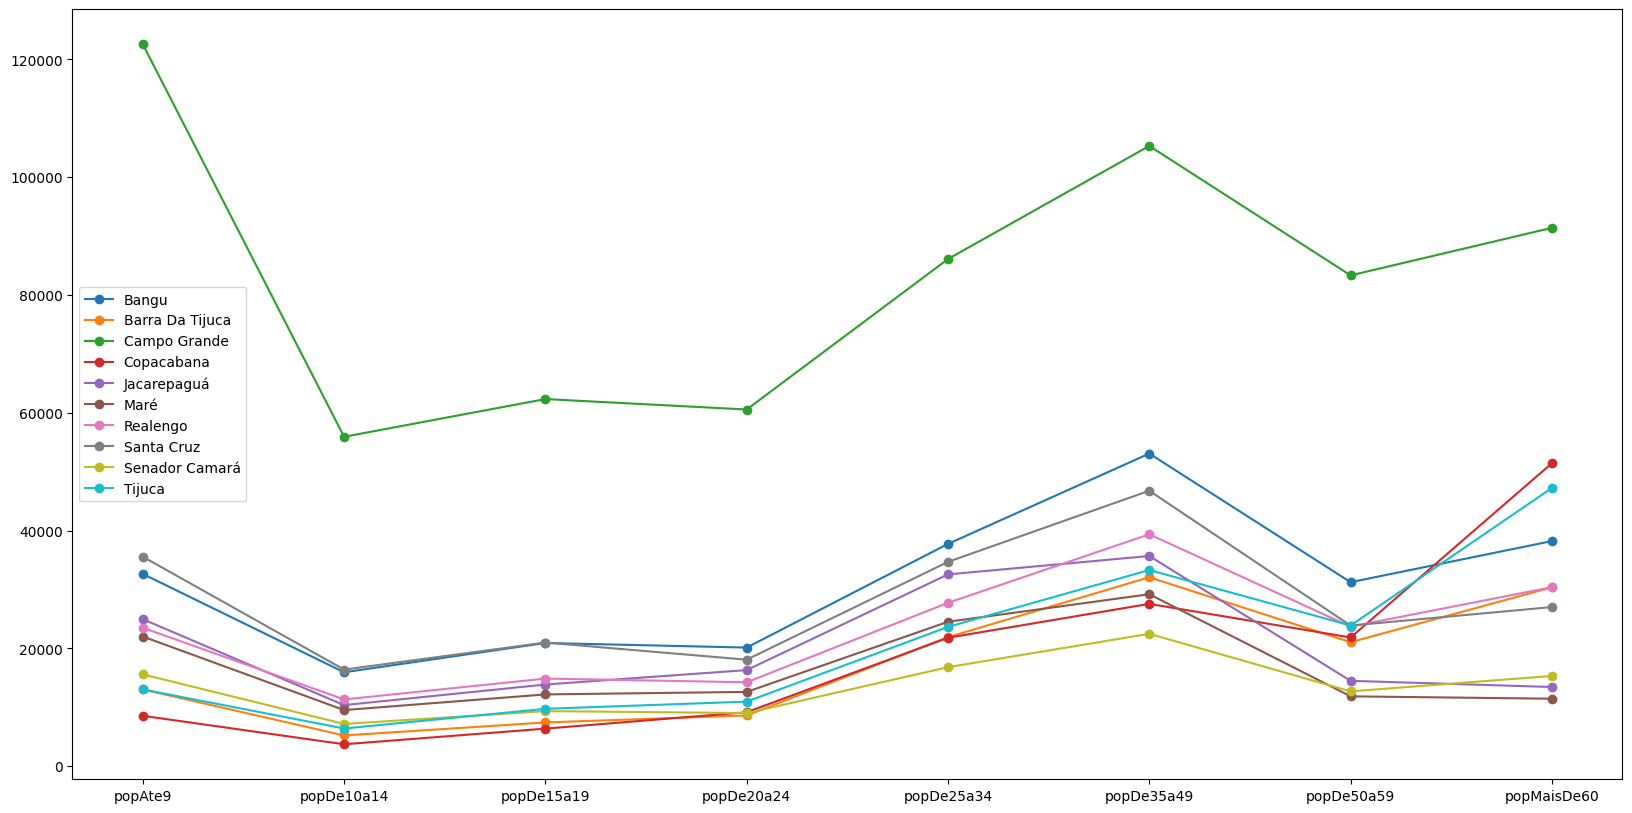

In [142]:
cols_to_plot = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
df_top_10_outliers = clean_df_rj[clean_df_rj['nome'].isin(top_10_outliers)]
# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in df_top_10_outliers.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the distribution curve
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
ax.legend()
# increase the size of the plot
fig.set_size_inches(20, 10)
# Show the plot
plt.show()

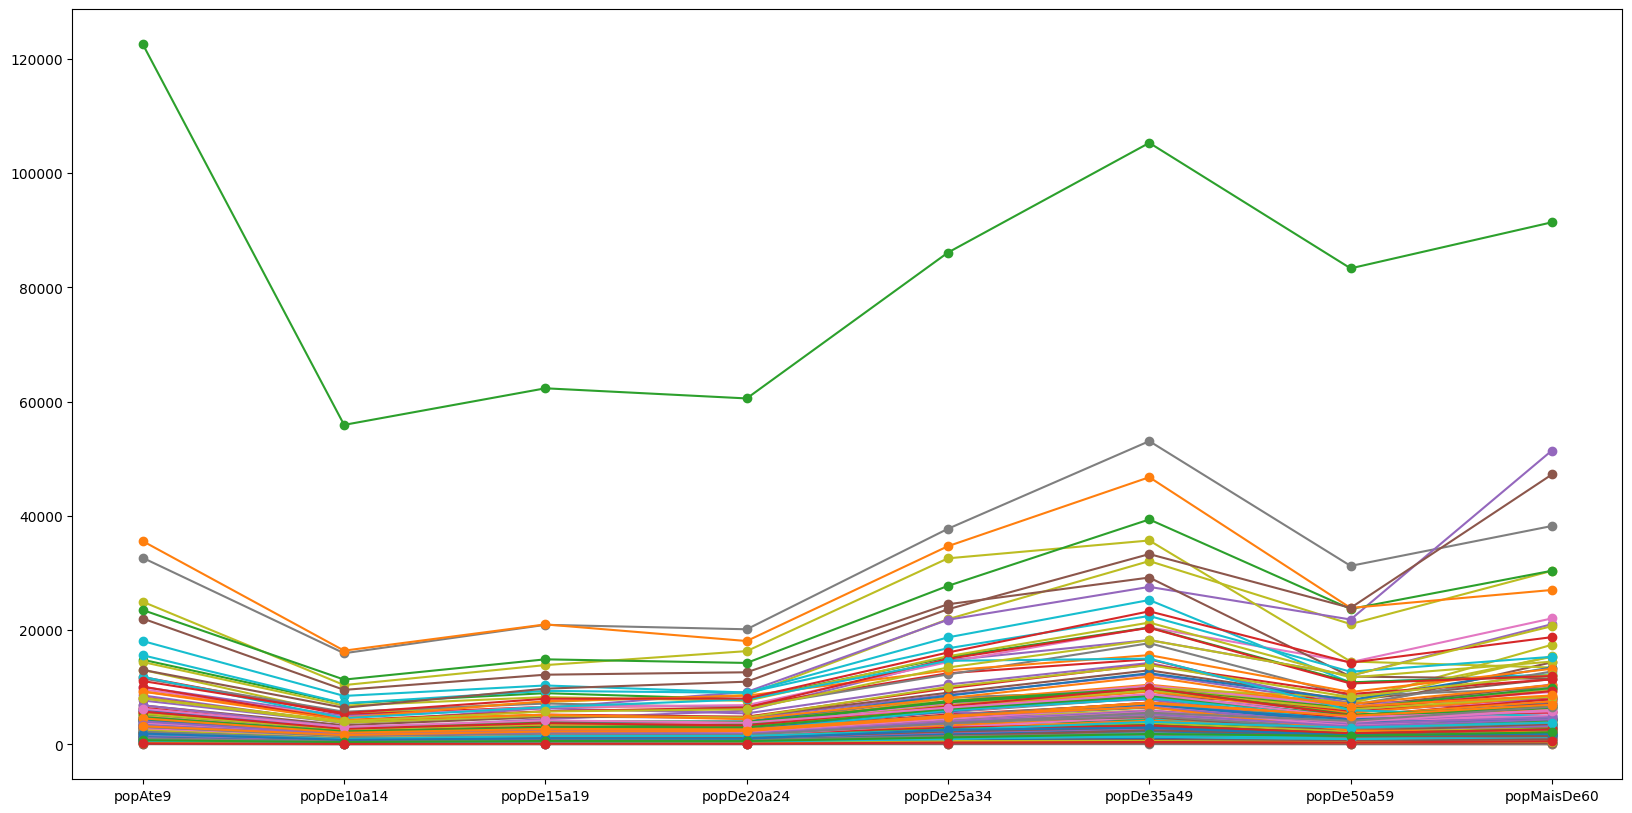

In [143]:
cols_to_plot = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in clean_df_rj.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the distribution curve
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
# ax.legend()
# increase the size of the plot
fig.set_size_inches(20, 10)
# Show the plot
plt.show()

In [144]:
# check for outliers
#clean_df_rj.describe(percentiles=np.arange(0, 1, 0.01))


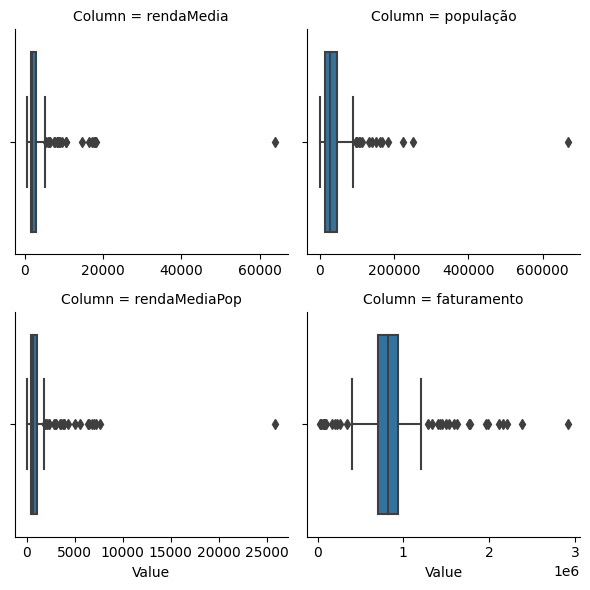

In [145]:
# Melt the DataFrame to create a "long" format
columns = ['rendaMedia','população','rendaMediaPop','faturamento']
plot_facetgrid(clean_df_rj, columns, plot_func=sns.boxplot)

In [146]:
clean_df_rj[clean_df_rj['rendaMedia'] > 40000.0]

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
80,Lagoa,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0,Alto,7755,5056,2628,2502,8824,0.283545,0.638939,563738888.0,25865.514476,0.572983,0.297824,0.076043,0.0,0.05315


In [147]:
clean_df_rj[clean_df_rj['população'] > 500000]

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
23,Campo Grande,667603,122578,55935,62342,60567,86116,105316,83341,91408,0,1389,11747,21237,33111,25779,4956,12944,1856.0,69645.0,Alto,191432,1389,32984,178513,111163,1.605867,0.822288,206318528.0,309.04374,0.012495,0.296717,0.529763,0.044583,0.116442


In [148]:
clean_df_rj[clean_df_rj['rendaMediaPop'] > 15000]

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
80,Lagoa,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0,Alto,7755,5056,2628,2502,8824,0.283545,0.638939,563738888.0,25865.514476,0.572983,0.297824,0.076043,0.0,0.05315


In [149]:
clean_df_rj[clean_df_rj['faturamento'] > 2e6]

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
9,Barra Da Tijuca,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0,Alto,54003,25076,20025,18263,54276,0.336484,0.559695,981527184.0,7022.897547,0.462009,0.368948,0.097244,0.000000,0.071800
15,Botafogo,85229,6278,2608,4410,5911,14697,18262,12026,21037,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0,Alto,32959,8834,17775,8886,37131,0.239315,0.566562,308781396.0,3622.961621,0.237914,0.478711,0.223479,0.009992,0.049904
36,Copacabana,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0,Alto,49381,14958,32510,12289,70052,0.175427,0.734383,517053812.0,3435.025723,0.213527,0.464084,0.235025,0.014247,0.073117
82,Leblon,47342,3134,1380,2131,2390,6177,9519,7181,15430,5423,3532,5342,1863,1890,917,217,1595,14738.0,2119774.0,Alto,15696,8955,7205,4514,20779,0.217239,0.742577,306240902.0,6468.693803,0.430964,0.346744,0.135088,0.010443,0.076760
141,Tijuca,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0,Alto,56970,12657,30707,19438,65661,0.296036,0.719590,515044884.0,3060.878746,0.192763,0.467660,0.263383,0.019494,0.056700


In [150]:
clean_df_rj[clean_df_rj['faturamento'] > 1.75e6]

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
9,Barra Da Tijuca,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0,Alto,54003,25076,20025,18263,54276,0.336484,0.559695,981527184.0,7022.897547,0.462009,0.368948,0.097244,0.000000,0.071800
15,Botafogo,85229,6278,2608,4410,5911,14697,18262,12026,21037,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0,Alto,32959,8834,17775,8886,37131,0.239315,0.566562,308781396.0,3622.961621,0.237914,0.478711,0.223479,0.009992,0.049904
36,Copacabana,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0,Alto,49381,14958,32510,12289,70052,0.175427,0.734383,517053812.0,3435.025723,0.213527,0.464084,0.235025,0.014247,0.073117
50,Flamengo,51456,2612,1241,2044,3049,8071,9582,7426,17431,3253,3648,7334,4041,3677,1434,184,986,10619.0,1981817.0,Alto,17653,6901,11375,3853,24557,0.156900,0.709818,260770783.0,5067.840155,0.281020,0.463208,0.208128,0.007493,0.040151
68,Ipanema,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0,Alto,14519,7645,6801,4372,19533,0.223826,0.735217,335733204.0,7639.328388,0.391389,0.348180,0.179696,0.005990,0.074745
80,Lagoa,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0,Alto,7755,5056,2628,2502,8824,0.283545,0.638939,563738888.0,25865.514476,0.572983,0.297824,0.076043,0.000000,0.053150
81,Laranjeiras,46839,3463,1529,2340,2814,7145,9917,6877,12754,2423,3297,5831,3467,3029,1180,118,557,8980.0,1762798.0,Alto,17062,5720,9298,4992,19902,0.250829,0.640840,178719960.0,3815.622878,0.287408,0.467189,0.211486,0.005929,0.027987
82,Leblon,47342,3134,1380,2131,2390,6177,9519,7181,15430,5423,3532,5342,1863,1890,917,217,1595,14738.0,2119774.0,Alto,15696,8955,7205,4514,20779,0.217239,0.742577,306240902.0,6468.693803,0.430964,0.346744,0.135088,0.010443,0.076760
141,Tijuca,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0,Alto,56970,12657,30707,19438,65661,0.296036,0.719590,515044884.0,3060.878746,0.192763,0.467660,0.263383,0.019494,0.056700


In [151]:
# drop nome Barra Da Tijuca, Campo Grande, Lagoa
columns_to_drop = ['Campo Grande', 'Lagoa']
clean_df_rj = clean_df_rj[~clean_df_rj['nome'].isin(columns_to_drop)]

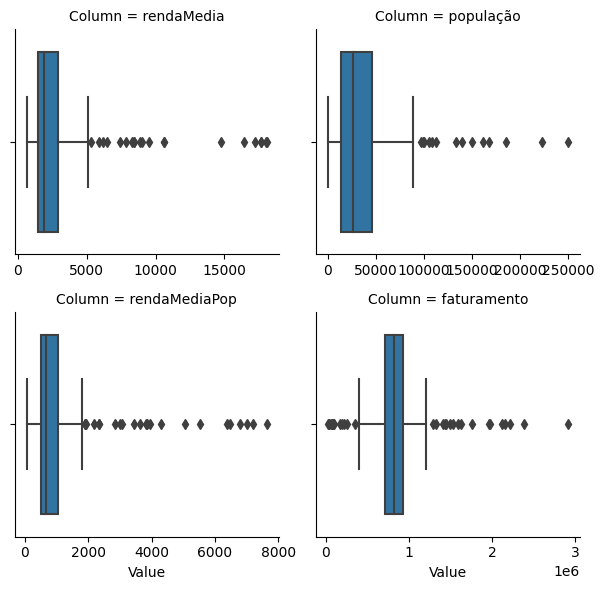

In [152]:
# Melt the DataFrame to create a "long" format
columns = ['rendaMedia','população','rendaMediaPop','faturamento']
plot_facetgrid(clean_df_rj, columns, plot_func=sns.boxplot)

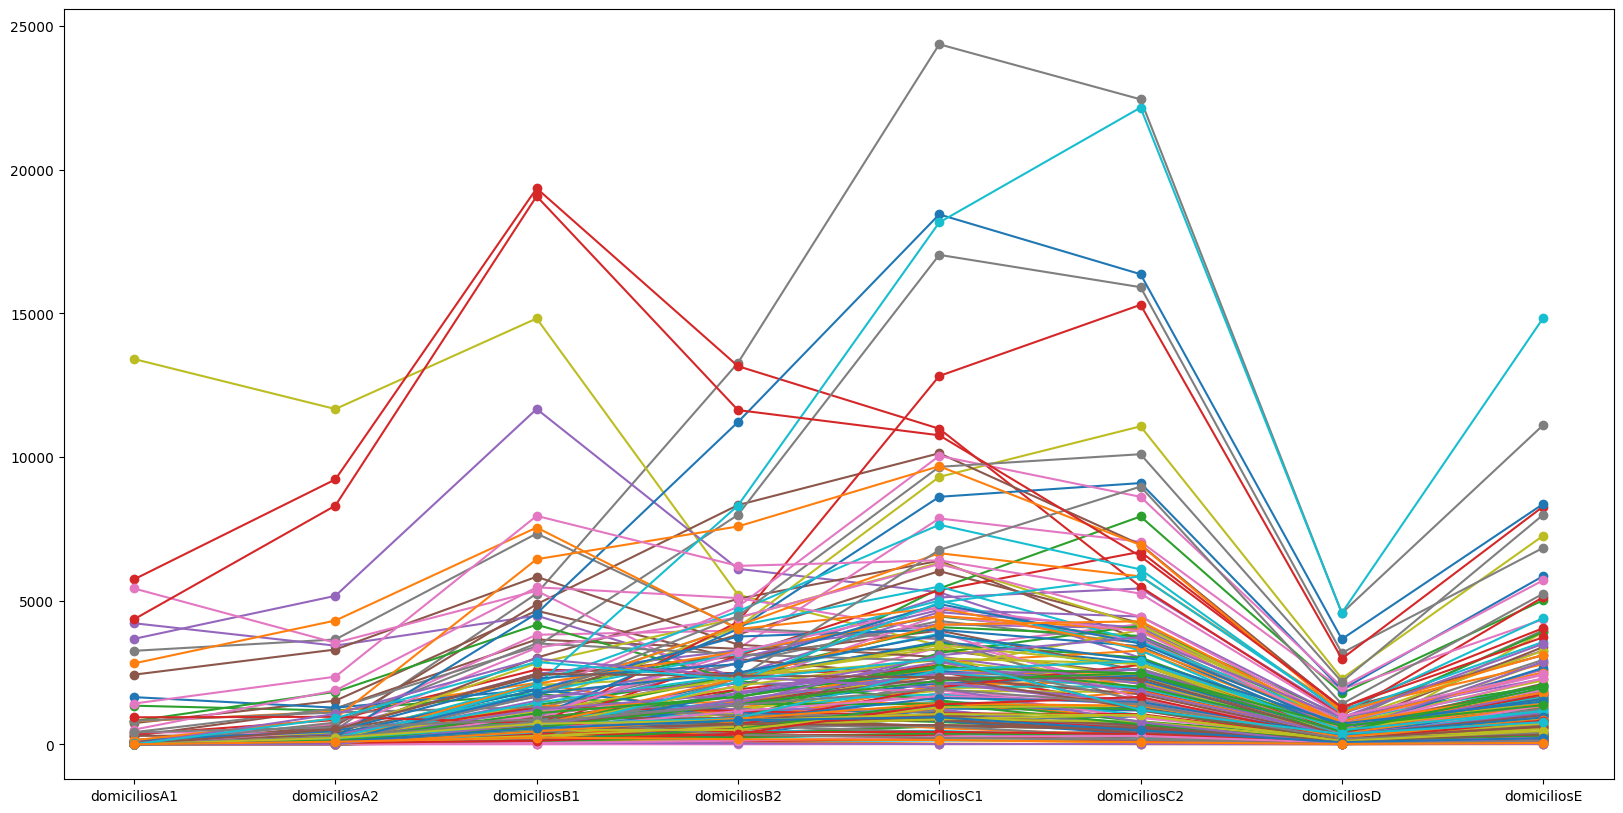

In [153]:
cols_to_plot = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2','domiciliosD', 'domiciliosE']
# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in clean_df_rj.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the distribution curve
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
# ax.legend()
# increase the size of the plot
fig.set_size_inches(20, 10)
# Show the plot
plt.show()

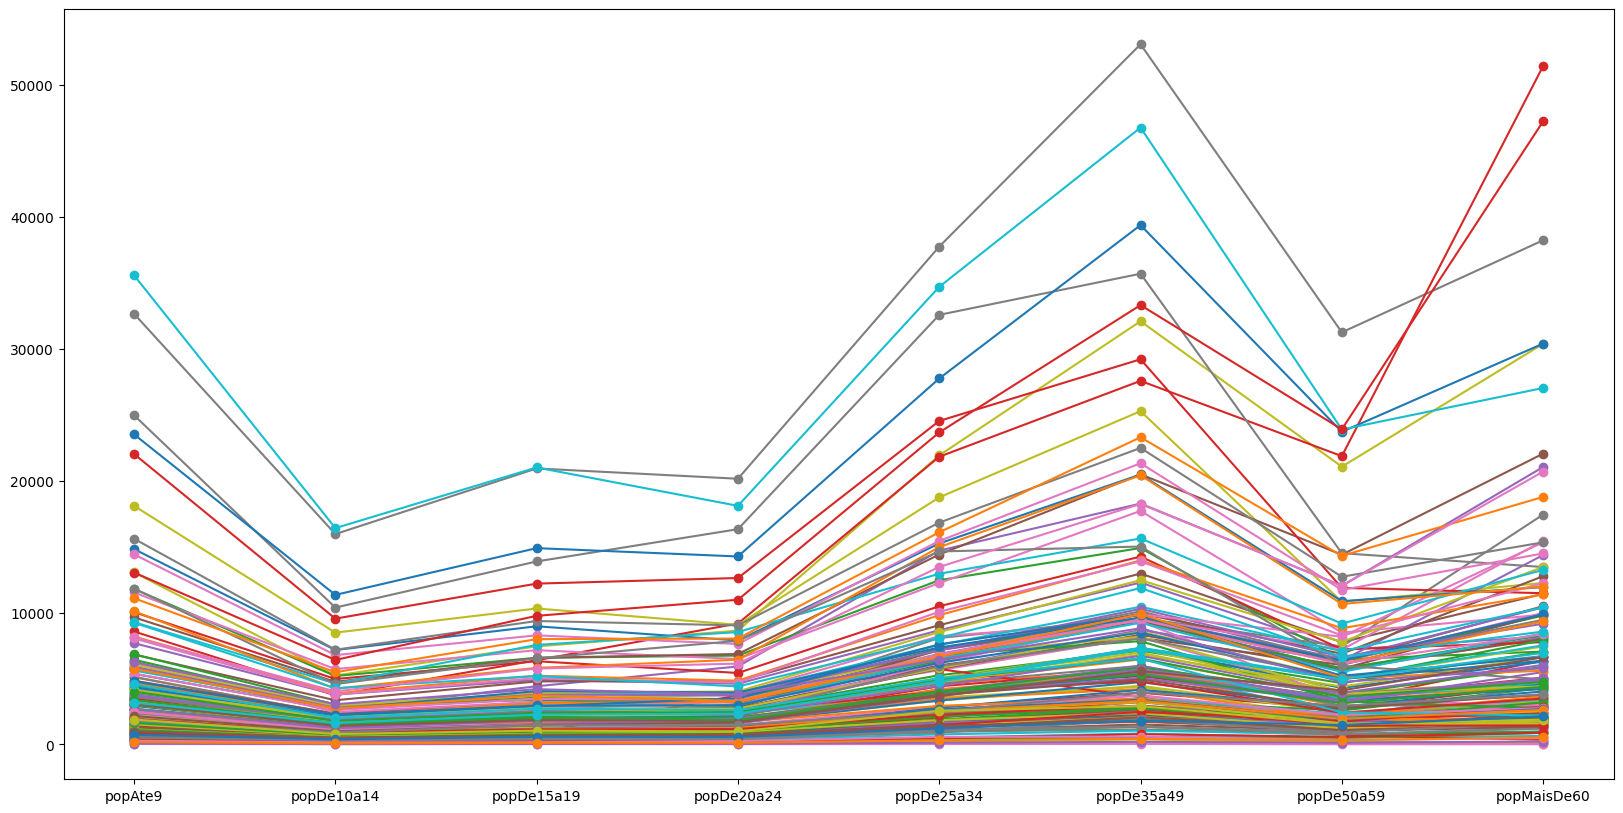

In [154]:
cols_to_plot = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each outlier
for i, row in clean_df_rj.iterrows():
    # Get the values for the columns to plot
    values = row[cols_to_plot].values
    
    # Plot the distribution curve
    ax.plot(cols_to_plot, values, label=row['nome'], linestyle='-', marker='o')

# Add a legend
# ax.legend()
# increase the size of the plot
fig.set_size_inches(20, 10)
# Show the plot
plt.show()

## Exportando dados

In [155]:
# export clean_df_rj to xlsx
clean_df_rj.to_excel('../Data/clean_data_rj.xlsx', index=False)
clean_df_sp.to_excel('../Data/clean_data_sp.xlsx', index=False)